# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics 

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [6]:
#I am going to use the function used in the class notes of Bayesian Statistics

def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

priors = [1/2, 1/2] #Probability of the bowls
likelihoods = [3/4, 1/2] #Vanilla in bowl
solution = bayes_rule(priors, likelihoods)
print("The prob that you picked a vanilla cookie from the first bowl is", solution[0])

The prob that you picked a vanilla cookie from the first bowl is 0.6


What is the probability that it came from Bowl 2?

In [7]:
print("The prob that you picked a vanilla cookie from the second bowl is", solution[1])

The prob that you picked a vanilla cookie from the second bowl is 0.4


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [14]:
priors= [1/2,1/2]
likelihoods= [1/4, 1/2]

solution1 = bayes_rule(priors, likelihoods)
print("The prob that you picked a chocolate cookie is", solution1[0])
print("The prob that you picked a choco cookie from bowl 2", solution1[1])

The prob that you picked a chocolate cookie is 0.3333333333333333
The prob that you picked a choco cookie from bowl 2 0.6666666666666666


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [43]:
priors = [1/2, 1/2]
likelihood_y = [0.2, 0.14]
likelihood_g = [0.1, 0.2]
Yellow = bayes_rule(priors, likelihood_y)

Yellow[0]

0.5882352941176471

In [44]:
Green = bayes_rule(priors,likelihood_g)


What is the probability that the yellow candy came from Bag 2?

In [46]:
print("Prob that yellow came from bag 2= ", Yellow[1])

Prob that yellow came from bag 2=  0.411764705882353


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [45]:
print("Prob that green came from bag 1 = ", Green[0])
print("Prob that green came from bag 2 = ", Green[1])

Prob that green came from bag 1 =  0.3333333333333333
Prob that green came from bag 2 =  0.6666666666666666


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [24]:
priors= [1/3, 1/3, 1/3]
likelihood=[1/2, 1/2, 1/2]
Montyhall = bayes_rule(priors, likelihood)

Montyhall[0]



0.3333333333333333

In [23]:
priors= [1/3, 1/3, 1/3]
likelihood= [1/2, 0, 2/2]
Montyhall1= bayes_rule(priors, likelihood)

print("Odds of sports car from A",Montyhall1[0])
print("Odds of sports car from C",Montyhall1[2])

Odds of sports car from A 0.3333333333333333
Odds of sports car from C 0.6666666666666666


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

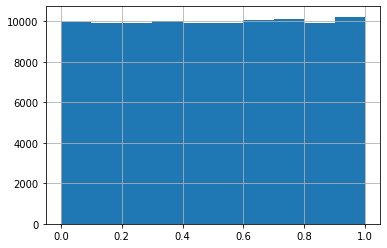

In [52]:
n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))

prior.hist()


signedup = 14

In [53]:
def generative_model(param):
    result = np.random.binomial(100, param)
    return result


In [54]:
sim_data = list()
for p in prior: 
    sim_data.append(generative_model(p))

In [55]:
#Creamos un subset condicionado
posteriordis = prior[list(map(lambda x: x== signedup, sim_data))]



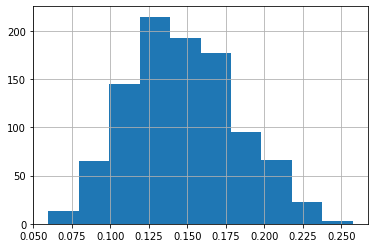

In [56]:
posteriordis.hist()

Produce a set of descriptive statistics for the posterior distribution.

In [59]:
posteriordis.describe()

count    995.000000
mean       0.147248
std        0.034698
min        0.059782
25%        0.121608
50%        0.144879
75%        0.170359
max        0.257545
dtype: float64

In [ ]:
# Median and mean are almost the same so we can say that the distribution is almost symmetric with almost 0 skewness.



What is the 90% credible interval range?

In [60]:
#I think that the exercise is like that but i am not totally sure about it.

print(posteriordis.quantile(.25))
print(posteriordis.quantile(.975))

0.12160784033788852
0.21952089608747477


What is the Maximum Likelihood Estimate?

In [61]:
rounded = posteriordis.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Max Likelihood Estimate: ', mode, '|',probability)

Max Likelihood Estimate:  0.14 | 0.11055276381909548
